<a href="https://colab.research.google.com/github/perkeje/find_the_statue_cnn/blob/main/Copy_of_FindTheStatue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-08-24 02:14:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-24 02:14:37 (74.5 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
from helper_functions import load_and_prep_image,unzip_data,create_tensorboard_callback,plot_loss_curves, compare_historys

In [ ]:
tf.version.VERSION

'2.8.2'

In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/ZavrssniRad/train"):
  print(f"There are {len(dirnames)} dirs and {len(filenames)} images in our{dirpath}")

There are 9 dirs and 0 images in our/content/drive/MyDrive/ZavrssniRad/train
There are 0 dirs and 49 images in our/content/drive/MyDrive/ZavrssniRad/train/5
There are 0 dirs and 45 images in our/content/drive/MyDrive/ZavrssniRad/train/6
There are 0 dirs and 49 images in our/content/drive/MyDrive/ZavrssniRad/train/8
There are 0 dirs and 45 images in our/content/drive/MyDrive/ZavrssniRad/train/0
There are 0 dirs and 43 images in our/content/drive/MyDrive/ZavrssniRad/train/2
There are 0 dirs and 44 images in our/content/drive/MyDrive/ZavrssniRad/train/3
There are 0 dirs and 42 images in our/content/drive/MyDrive/ZavrssniRad/train/7
There are 0 dirs and 63 images in our/content/drive/MyDrive/ZavrssniRad/train/1
There are 0 dirs and 39 images in our/content/drive/MyDrive/ZavrssniRad/train/4


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMAGE_SHAPE = (256,256)
BATCH_SIZE = 32

all_dir = "/content/drive/MyDrive/ZavrssniRad/train"

                         

train_data = tf.keras.utils.image_dataset_from_directory(all_dir,
                                              shuffle = True,
                                              image_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              label_mode="categorical",
                                              crop_to_aspect_ratio=True,
                                              seed=42,
                                              validation_split=0.15,
                                              subset='training',
                                              )

test_data = tf.keras.utils.image_dataset_from_directory(all_dir,
                                              shuffle = True,
                                              image_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              label_mode="categorical",
                                              crop_to_aspect_ratio=True,
                                              seed=42,
                                              validation_split=0.15,
                                              subset='validation',
)

Found 419 files belonging to 9 classes.
Using 357 files for training.
Found 419 files belonging to 9 classes.
Using 62 files for validation.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential


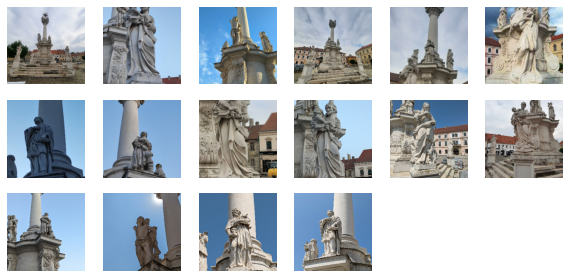

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
class_names = train_data.class_names
for images, labels in train_data.take(1):
    for i in range(16):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:

data_augmentation = Sequential([
  preprocessing.Rescaling(1./255)
], name="data_augmentation")



In [ ]:
base_model = tf.keras.applications.vgg16.VGG16(include_top=False)
base_model.trainable=False
inputs = layers.Input(shape=(256,256,3),name="input_layer")
x= data_augmentation(inputs)
x= base_model(x,training=False)
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(len(train_data.class_names),activation="softmax")(x)
model = tf.keras.Model(inputs,outputs)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 256, 256, 3)      0         
 al)                                                             
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_avg_pool_layer (Glob  (None, 512)              0         
 alAveragePooling2D)                                             
                                                                 
 dense_4 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 14,719,305
Trainable params: 4,617
Non-traina

In [ ]:
checkpoint_path="checkpoint_1"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 =model.fit(train_data,
                     epochs=5, 
                     steps_per_epoch= len(train_data),
                     validation_data=test_data,
                     validation_steps=int(.5*len(test_data)),
                     callbacks=[checkpoint_callback]
                     )

Epoch 1/5
12/12 [==============================] - 19s 626ms/step - loss: 2.3007 - accuracy: 0.1429 - val_loss: 2.2407 - val_accuracy: 0.1562
Epoch 2/5
12/12 [==============================] - 19s 597ms/step - loss: 2.1212 - accuracy: 0.2017 - val_loss: 2.2168 - val_accuracy: 0.2500
Epoch 3/5
12/12 [==============================] - 17s 600ms/step - loss: 2.0540 - accuracy: 0.3109 - val_loss: 2.0194 - val_accuracy: 0.4375
Epoch 4/5
12/12 [==============================] - 17s 600ms/step - loss: 1.9908 - accuracy: 0.3641 - val_loss: 1.9835 - val_accuracy: 0.4688
Epoch 5/5
12/12 [==============================] - 18s 681ms/step - loss: 1.9296 - accuracy: 0.4566 - val_loss: 2.0022 - val_accuracy: 0.3750


In [ ]:
feature_extraction_model = model.evaluate(test_data)
feature_extraction_model

2/2 [==============================] - 3s 199ms/step - loss: 1.9447 - accuracy: 0.4677


[1.9447381496429443, 0.4677419364452362]

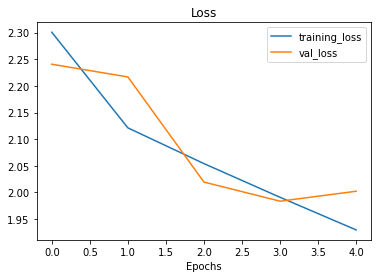

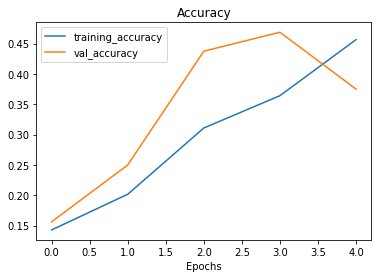

In [ ]:
plot_loss_curves(history_1)

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-15]:
  layer.trainable = False
  model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 10

history_fine_tuned = model.fit(train_data,
                      epochs=fine_tune_epochs,
                      validation_data=test_data,
                      validation_steps=int(.5*len(test_data)),
                      initial_epoch=history_1.epoch[-1])

Epoch 5/10
12/12 [==============================] - 21s 815ms/step - loss: 1.4285 - accuracy: 0.4622 - val_loss: 1.5256 - val_accuracy: 0.5625
Epoch 6/10
12/12 [==============================] - 20s 804ms/step - loss: 0.8827 - accuracy: 0.6919 - val_loss: 0.4666 - val_accuracy: 0.8438
Epoch 7/10
12/12 [==============================] - 20s 803ms/step - loss: 0.5685 - accuracy: 0.8039 - val_loss: 0.5638 - val_accuracy: 0.8438
Epoch 8/10
12/12 [==============================] - 20s 793ms/step - loss: 0.3192 - accuracy: 0.8824 - val_loss: 0.2674 - val_accuracy: 0.8750
Epoch 9/10
12/12 [==============================] - 21s 904ms/step - loss: 0.0946 - accuracy: 0.9832 - val_loss: 0.2865 - val_accuracy: 0.9062
Epoch 10/10
12/12 [==============================] - 20s 788ms/step - loss: 0.0744 - accuracy: 0.9748 - val_loss: 0.0865 - val_accuracy: 0.9688


In [ ]:
fine_tuned_model = model.evaluate(test_data)
fine_tuned_model

2/2 [==============================] - 3s 197ms/step - loss: 0.0901 - accuracy: 0.9839


[0.09012527018785477, 0.9838709831237793]

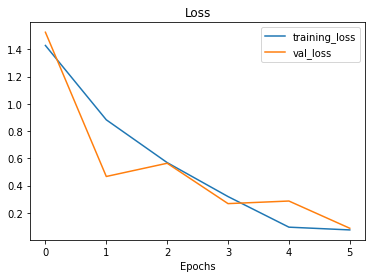

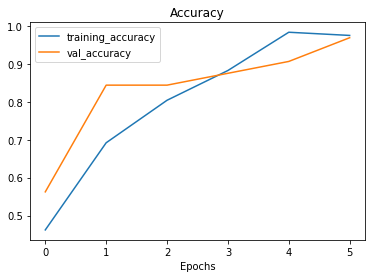

In [ ]:
plot_loss_curves(history_fine_tuned)

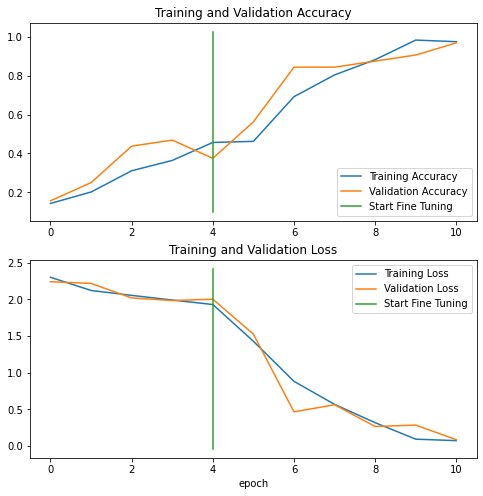

In [ ]:
compare_historys(history_1,
                 history_fine_tuned,
                 5)

In [ ]:
model.evaluate(train_data)

12/12 [==============================] - 15s 357ms/step - loss: 0.0200 - accuracy: 0.9972


[0.020034514367580414, 0.9971988797187805]

In [ ]:
def load_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  h, w = img.shape[-3], img.shape[-2]
  if h > w:
      cropped_image = tf.image.crop_to_bounding_box(img, (h - w) // 2, 0, w, w)
  else:
      cropped_image = tf.image.crop_to_bounding_box(img, 0, (w - h) // 2, h, h)
  img =  tf.image.resize(cropped_image, (256, 256))
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [ ]:
import matplotlib.pyplot as plt

img = load_image("/content/drive/MyDrive/ZavrssniRad/train/4/PXL_20220807_112701890.jpg",img_shape=256,scale =False)
model.predict(tf.expand_dims(img,0)).argmax()

4

In [ ]:
# from keras.models import load_model

# model.save('statue-recognizer.tf')
# !zip -r /content/statue-recognizer.zip /content/statue-recognizer.tf

In [ ]:
# from google.colab import files
# files.download("/content/statue-recognizer.zip")